<IPython.core.display.Javascript object>


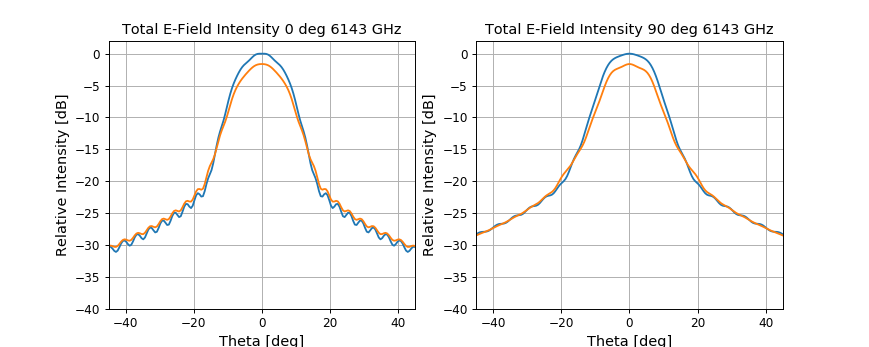

SAFARI_SW1_short_PEC
SAFARI_SW1_short_PEC
SAFARI_SW1_short_0p1_rough
SAFARI_SW1_short_PEC
SAFARI_SW1_short_0p1_rough


In [17]:
%matplotlib notebook
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
freq = 6143
# set up plot
plt.figure(figsize=(10,4),dpi=100)
ax0 = plt.subplot(121)
ax0.set_title("Total E-Field Intensity 0 deg %s GHz"%(freq), fontsize=12)
ax0.set_xlabel("Theta [deg]" ,fontsize = 12)
ax0.set_ylabel("Relative Intensity [dB]" ,fontsize = 12)
ax90 = plt.subplot(122)
ax90.set_title("Total E-Field Intensity 90 deg %s GHz"%(freq), fontsize=12)
ax90.set_xlabel("Theta [deg]" ,fontsize = 12)
ax90.set_ylabel("Relative Intensity [dB]" ,fontsize = 12)

ax0.set_xlim([-45, 45])
ax0.grid(True)   

ax90.set_xlim([-45, 45])
ax90.grid(True)  

# generate angle values
MAXPHI = np.pi/2
MAXTHETA = np.pi/2
STARTPHI=-np.pi/2
STARTTHETA = -np.pi/2
NUMPHI = 180
NUMTHETA = 360
PHI, THETA = np.meshgrid(np.linspace(STARTPHI,MAXPHI, NUMPHI), np.linspace(STARTTHETA,MAXTHETA,NUMTHETA))
theta = np.rad2deg(THETA[:,0])

Horn_designs = widgets.SelectMultiple(
                options=['SAFARI_SW1_short', 'SAFARI_SW1_med', 'SAFARI_SW1_long'],
                value=['SAFARI_SW1_short'],
                #rows=10,
                description='Horns',
                disabled=False
                )

Wall_Material = widgets.SelectMultiple(
                options=['PEC', '0p1_rough', '0p3_rough', '1p0_rough'], 
                value=['PEC'], 
                description='Wall_Material',
                disabled=False
                )

App_size = widgets.SelectMultiple(
                options=['100', '120', '150'],
                value=['100'],
                #rows=10,
                description='App_size',
                disabled=False
                )

Y_LimLEFT= widgets.IntRangeSlider(
    value=(-40, 2), 
    min=-100, max=10, step=1, 
    description='Y Limit 0'
)
Y_LimRIGHT= widgets.IntRangeSlider(
    value=(-40, 2), 
    min=-100, max=10, step=1, 
    description='Y Limit 90'
)


PlotButton = widgets.Button(
    description='Plot Selected',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Plot Selected',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

showLegend=widgets.Checkbox(
    value=True,
    description='Show Legend',
    disabled=False,
    indent=False
)


def update(change):
    """Remove old lines from plot and plot new one"""
    ax0.clear()
    ax90.clear()
    
    C = []
    ET0 = []
    ET90 = []
    
    for horn in Horn_designs.value:
        for material in Wall_Material.value:
            for aperture in App_size.value:
                if aperture == "100":
                    load = horn+"_"+material
                else:
                    load = horn+"_"+aperture+"_"+material
                ET0.append(np.loadtxt("Farfield_Cuts/%s_0.dat"%load))
                ET90.append(np.loadtxt("Farfield_Cuts/%s_90.dat"%load))
                C.append(load)
        
        
    for Cn in C:
        print(Cn)
    MAX = np.max(np.asarray(ET0))
    for Cn, ETn0,ETn90 in zip(C,ET0,ET90):
        ax0.plot(theta, 10*np.log10(ETn0/MAX),label=Cn)
        ax90.plot(theta, 10*np.log10(ETn90/MAX),label=Cn)
        
    ax0.set_title("Total E-Field Intensity 0 deg %s GHz"%(freq), fontsize=12)
    ax90.set_title("Total E-Field Intensity 90 deg %s GHz"%(freq), fontsize=12)
    
    ax0.set_xlim([-45, 45])
    ax0.set_ylim(Y_LimLEFT.value)
    ax0.grid(True)   
    ax0.set_xlabel("Theta [deg]" ,fontsize = 12)
    ax0.set_ylabel("Relative Intensity [dB]" ,fontsize = 12)
    
    ax90.set_xlim([-45, 45])
    ax90.set_ylim(Y_LimRIGHT.value)
    ax90.grid(True) 
    ax90.set_xlabel("Theta [deg]" ,fontsize = 12)
    ax90.set_ylabel("Relative Intensity [dB]" ,fontsize = 12)
    if showLegend.value:
        ax0.legend(loc="lower center")
        ax90.legend(loc="lower center")
    
PlotButton.on_click(update)

    
    
# a VBox container to pack widgets vertically
vbox1 = widgets.VBox([Horn_designs,  
                      Wall_Material, 
                      App_size,])

vbox2 = widgets.VBox([Y_LimLEFT])
vbox3 = widgets.VBox([Y_LimRIGHT,
                      PlotButton,
                      showLegend])

widgets.HBox([vbox1,
              vbox2,
              vbox3])
